In [1]:
#load packcages
import pandas as pd
import keras
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
import ggplot as gp

%matplotlib inline

C:\Users\ziying\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\ziying\AppData\Local\Continuum\anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [2]:
#preparing data(v2)
def create_dataset2(dataset, minutes,look_back):   
    """
    global dataX
    global dataY
    """
    dataX = dataset[1:len(dataset)-look_back-minutes][['total']]
    dataX.index=range(len(dataset)-look_back-1-minutes)
    dataY = dataset[look_back+1:len(dataset)][['total']]
    temp = pd.DataFrame()
    for j in range(look_back-1):
        #for i in range(len(dataset)-look_back-1):
        temp=dataset[j+1:len(dataset)-look_back+j][['total']]
        temp.index=range(len(dataset)-look_back-1)
        dataX[str(j)] = temp
    dataX = np.array(dataX)
    dataY = np.array(dataY)
    ss = StandardScaler()
    train_X = ss.fit_transform(dataX)
    origin_data = ss.inverse_transform(train_X)
    train_X = train_X.reshape(len(train_X),look_back,1)
    train_Y = ss.fit_transform(dataY)
    origin_data2 = ss.inverse_transform(train_Y)
    return train_X, train_Y, origin_data, origin_data2

In [3]:
#preparing data
def create_dataset(dataset, look_back):   
    """
    dataset:a df
    look_back: how many minutes you want to predict
    """
    dataX = dataset[1:len(dataset)-look_back][['total']]
    dataX.index=range(len(dataset)-look_back-1)
    dataY = dataset[look_back+1:len(dataset)][['total']]
    temp = pd.DataFrame()
    for j in range(look_back-1):
        #for i in range(len(dataset)-look_back-1):
        temp = dataset[j+1:len(dataset)-look_back+j][['total']]
        temp.index = range(len(dataset)-look_back-1)
        dataX[str(j)] = temp
    dataX = np.array(dataX)
    dataY = np.array(dataY)
    ss = StandardScaler()
    train_X = ss.fit_transform(dataX)
    origin_data = ss.inverse_transform(train_X)
    train_X = train_X.reshape(len(train_X),look_back,1)
    train_Y = ss.fit_transform(dataY)
    origin_data2 = ss.inverse_transform(train_Y)
    return train_X, train_Y, origin_data, origin_data2

In [4]:
#building model
def building_LSTM(dataX,dataY,times,model_path):
    model = Sequential()
    model.add(LSTM(activation='tanh',input_shape = dataX[0].shape, output_dim=5, return_sequences = False))
    model.add(Dense(output_dim = 1))
    model.compile(optimizer='adam', loss='mae',metrics=['mse']) 

    model.fit(dataX , dataY, epochs = times , batch_size=1, verbose = 2,shuffle=False)
    model.save(model_path)
    y_pred = model.predict(dataX)
    residual_train = pd.DataFrame(dataY-y_pred)
    return residual_train

In [5]:
#update model
def update_LSTM(dataX,dataY,times,model_path):
    model = load_model(model_path)
    model.fit(dataX , dataY, epochs = times , batch_size=1, verbose = 2,shuffle=False)
    model.save(model_path)
    y_pred = model.predict(dataX)
    residual_train = pd.DataFrame(dataY-y_pred)
    return residual_train

In [6]:
#setting bars and judging abnormal
def judge_abnormal(data,model_path,look_back,residual_train,a,b):
    #load model
    try:
        model = load_model(model_path)
        dataX2,dataY2, origin_data12, origin_data22 = create_dataset(data, look_back)
        y_pred = model.predict(dataX2)
        plt.plot(y_pred)
        plt.plot(dataY2)
        residual = pd.DataFrame(dataY2-y_pred)
        residual.columns=['r']
        plt.plot(residual.r)
        """
        p=gp.ggplot(gp.aes(x='date',y='beef'),data=meat)+gp.geom_line(color='blue')+gp.ggtitle(u'折线图')
        print p
        """
        for i in range(len(y_pred)):
            if residual.r.iloc[i-1] < st.scoreatpercentile(residual_train,a) or residual.r.iloc[i-1] > st.scoreatpercentile(residual_train,b):
            #print(i)
                print(str(i)+"   situation is abnormal")
            else:
                print('situation is normal')
    except:
        return 'error'

In [7]:
#load data
df = pd.read_csv('C://Users//ziying//Downloads//caty2primary.db.ebay.com.csv')

In [8]:
dataset =df[20000:40000]
look_back = 4
model_path = 'C://Users//ziying//Downloads//my_model.h5'
times = 5

In [9]:
#examples
dataX,dataY, origin_data, origin_data2 = create_dataset(dataset,look_back)

C:\Users\ziying\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ziying\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ziying\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ziying\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
residual_train = building_LSTM(dataX,dataY,times,model_path)

C:\Users\ziying\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(activation="tanh", input_shape=(4, 1), return_sequences=False, units=5)`
  after removing the cwd from sys.path.
C:\Users\ziying\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  """


Epoch 1/5
 - 44s - loss: 0.0716 - mean_squared_error: 0.0146
Epoch 2/5
 - 46s - loss: 0.0531 - mean_squared_error: 0.0066
Epoch 3/5
 - 45s - loss: 0.0446 - mean_squared_error: 0.0044
Epoch 4/5
 - 46s - loss: 0.0392 - mean_squared_error: 0.0034
Epoch 5/5
 - 46s - loss: 0.0365 - mean_squared_error: 0.0029


In [11]:
residual_train = update_LSTM(dataX,dataY,times,model_path)

Epoch 1/5
 - 58s - loss: 0.0357 - mean_squared_error: 0.0028
Epoch 2/5
 - 62s - loss: 0.0355 - mean_squared_error: 0.0027
Epoch 3/5


KeyboardInterrupt: 

In [12]:
a = 2.5
b = 97.5

In [59]:
judge_abnormal(dataX2,model_path,look_back)

'error'

In [13]:
dataset2 = df[39226:42000]

C:\Users\ziying\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ziying\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ziying\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ziying\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal


situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal


situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal


situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal


situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
1681   situation is abnormal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation i

situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal


situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal
situation is normal


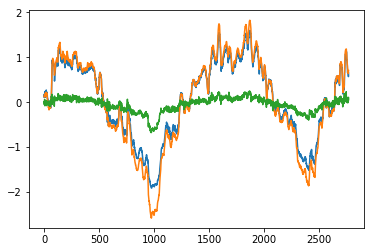

In [14]:
judge_abnormal(dataset2,model_path,look_back,residual_train,a,b)

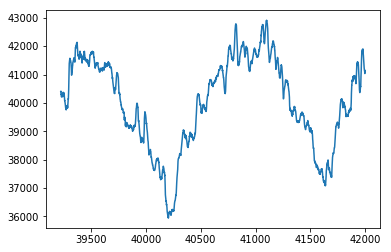

In [18]:
plt.plot(dataset2.total)

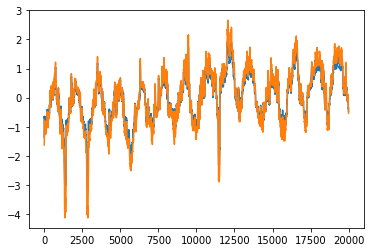

In [103]:
plt.plot(y_pred)
plt.plot(dataY)

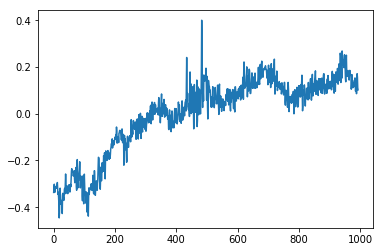

In [47]:
b = pd.DataFrame(dataY2-y_pred)
plt.plot(b)

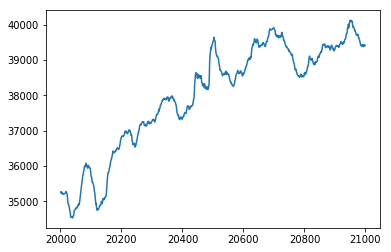

In [45]:
plt.plot(df[20001:21000][['total']])

In [82]:
def judge_abnormal(data,model_path):
    #load model
    try:
        model = joblib.load(model_path)
        data.columns=['ds','total']
        forecast = model.predict(data)
        if int(data.total) < int(forecast.yhat_lower) or int(data.total) > int(forecast.yhat_upper):
            return "situation is abnormal"
        else:
            return "situation is normal"
    except:
        return 'error'

In [55]:
b.columns=['r']
b.describe()

,r
count,994.000000
mean,-0.001946
std,0.164198
min,-0.445799
25%,-0.083798
50%,0.049380
75%,0.119341
max,0.400348


In [56]:
st.scoreatpercentile(b,97.5)

0.20806177672635262

In [57]:
st.scoreatpercentile(b,2.5)

-0.3524341205512061

In [102]:
y_pred = model.predict(dataX)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = [1, 1, 2, 2]
Y = [3, 4, 4, 3]
Z = [1, 2, 1, 1]
ax.scatter(X, Y, Z)
plt.show()

NameError: name 'plt' is not defined

In [19]:
dataX.mean()

-5.230902260759527e-16

In [20]:
dataX.std()

1.0

In [22]:
dataX.min()

-3.0455937520035037

In [23]:
dataX.max()

2.2051451904246377

In [24]:
def json_to_df(json_request):
    a = []
    for i in range():
        a.append()
    dataset = pd.DataFrame()
    return dataset